# Ex - 12 Custom Template

### Introduction:

This time you will create a data 

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [3]:
import numpy as numpy 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Step 2. Import the dataset from this [address](https://www.kaggle.com/datasets/surajjha101/cuisine-rating?resource=download). 

### Step 3. Assign it to a variable called df_ratings

In [4]:
df_ratings = pd.read_csv("Cuisine_rating.csv")
df_ratings.head()


,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


### Step 4. How much records we have ?

In [5]:
print(f"We have a Dataset of {len(df_ratings)} Rows")

We have a Dataset of 200 Rows


### Step 5. Assigning the User id As `INDEX`

In [6]:
df_ratings.set_index("User ID",inplace=True,drop=True)
df_ratings.head()

,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
User ID,,,,,,,,,,,,,,
1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


### Step 6. Exploring the Column `Area Code`

In [7]:
df_ratings["Area code"].unique()

array([153, 123, 122, 129, 111, 107, 154, 117, 192, 137, 121, 198, 172,
       188, 166, 124, 131, 149, 101, 104, 140, 145, 159, 195, 105, 130,
       139, 113, 127, 134, 148, 158, 161, 167, 176, 110, 120, 142, 162,
       173, 184, 199, 102, 106, 157, 185, 147, 183, 138, 136, 169, 196,
       175, 135, 125, 186, 194, 182, 197, 179, 163, 178, 103, 170, 160],
      dtype=int64)

In [8]:
print("Here we have different",len(df_ratings["Area code"].unique()),"Area Codes in the Dataset!")

Here we have different 65 Area Codes in the Dataset!


### Step 7. Exploring some Aspects of the Column `Location`

In [9]:
df_ratings["Location"].unique()

array(['Upper East Side,NY', 'St. George,NY', 'Upper West Side,NY',
       'Central Park,NY', 'China Town, NY', 'Riverdale,NY',
       'Market City, NY', 'Central Park,ny', 'Market City, MY',
       'Cedar Hill, NY'], dtype=object)

In [14]:
df_ratings.groupby(by="Location").size().reset_index(name='counts')

,Location,counts
0,"Cedar Hill, NY",2
1,"Central Park,NY",24
2,"Central Park,ny",8
3,"China Town, NY",22
4,"Market City, MY",2
5,"Market City, NY",20
6,"Riverdale,NY",28
7,"St. George,NY",46
8,"Upper East Side,NY",30
9,"Upper West Side,NY",18


### Step 8. Plotting a Pie chart of Male VS Female

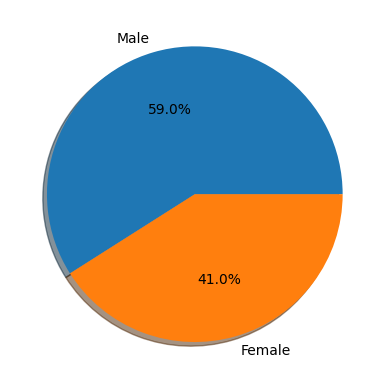

In [21]:
plt.pie(x=df_ratings["Gender"].value_counts(),labels=["Male","Female"],shadow=True,autopct='%1.1f%%');

### Step 9. Visualizing the DOB Column

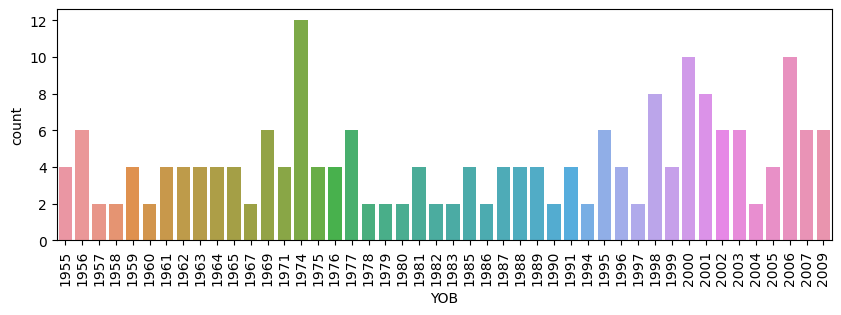

In [34]:
plt.figure(figsize=(10,3))
sns.countplot(data=df_ratings,x="YOB")

plt.xticks(rotation=90);

**Here we can clearly observe that YEAR 1974 have more number of data compared to others**

### Step 10. Plotting Pie Chart for `Maritial Status`

In [35]:
df_ratings["Marital Status"].value_counts()

Marital Status
Single      100
Married      86
Divorced     14
Name: count, dtype: int64

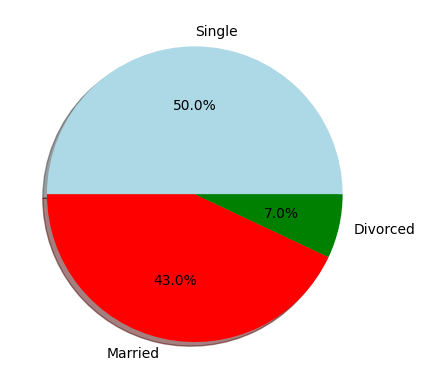

In [40]:
plt.pie(x=df_ratings["Marital Status"].value_counts(),labels=["Single","Married","Divorced"],shadow=True,autopct='%1.1f%%',colors=["lightblue","red","green"]);

### Step 11. How much are Students and Professional and as well as visualizing them 

In [42]:
df_ratings["Activity"].value_counts()

Activity
Student         120
Professional     80
Name: count, dtype: int64

<Axes: xlabel='Activity', ylabel='count'>

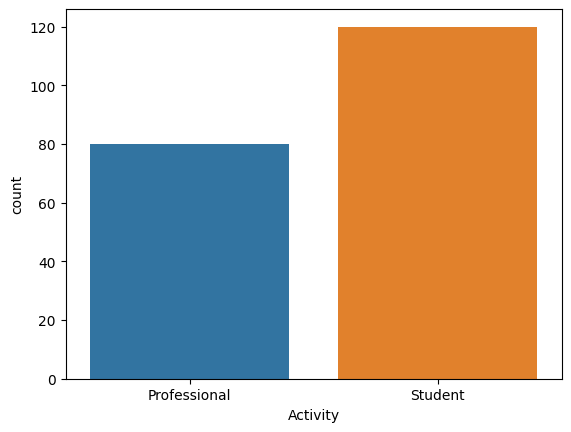

In [46]:
sns.countplot(data=df_ratings,x="Activity")

### Step 12. Data Type of the Column `Budget` and their little Exploration

In [48]:
df_ratings["Budget"].dtypes

dtype('int64')

In [50]:
df_ratings["Budget"].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [56]:
df_ratings.groupby(by="Budget").size().reset_index(name="counts")

,Budget,counts
0,1,10
1,2,4
2,3,61
3,4,63
4,5,62


### Step 13. How much Different Cuisines are there and which are they ?

In [57]:
df_ratings["Cuisines"].unique()

array(['Japanese', 'Indian', 'Seafood', 'Filipino', 'Italian', 'Chinese',
       'French'], dtype=object)

**There are different 7 Cuisines as stated as above**

### Step 14. Visalizing the Food, Service, and Overall Rating at Once

<Axes: xlabel='Service Rating', ylabel='count'>

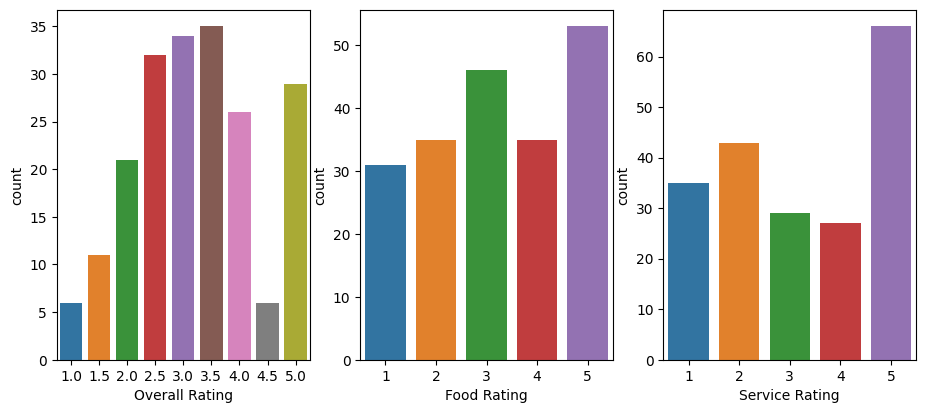

In [180]:
plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
sns.countplot(x=df_ratings["Overall Rating"])
plt.subplot(2,4,2)
sns.countplot(x=df_ratings["Food Rating"])
plt.subplot(2,4,3)
sns.countplot(x=df_ratings["Service Rating"])


### Step 15. Pie chart for Smoker and Alcohol Together.

In [190]:
df_ratings["Alcohol "].unique()

array(['Never', 'Often', 'Socially'], dtype=object)

Text(0.5, 1.0, 'Pie Chart for Alcohol')

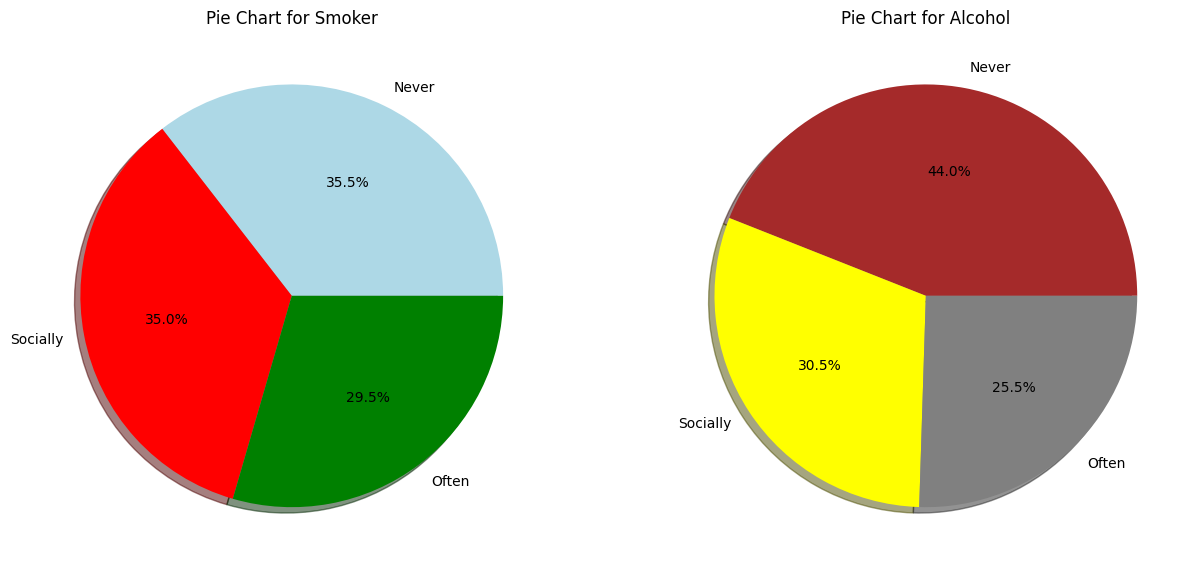

In [210]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.pie(x=df_ratings["Smoker"].value_counts(),labels=["Never","Socially","Often"],shadow=True,autopct='%1.1f%%',colors=["lightblue","red","green"]);
plt.title("Pie Chart for Smoker")
plt.subplot(1,2,2)
plt.pie(x=df_ratings["Alcohol "].value_counts(),labels=["Never","Socially","Often"],shadow=True,autopct='%1.1f%%',colors=["brown","yellow","gray"]);
plt.title("Pie Chart for Alcohol")

### Step 16. Proportion info of the Last Column `Often AS`

In [211]:
df_ratings["Often A S"].value_counts(normalize=True)

Often A S
No     0.87
Yes    0.13
Name: proportion, dtype: float64